# Week 5

## Notes

### Populations models

We would like to model the change in a population over time.

The basic model, the next population depends on the current population.  $$ P(t+1) = P(t)(1+\alpha) $$

In [15]:
def PopulationModel(P_0,alpha,T):
    population_values = [P_0]
    current_population = P_0
    for t in range(T-1):
        new_population = current_population*(1+alpha)
        current_population = new_population
        population_values.append(new_population)
    return population_values

In [20]:
PopulationModel(100,0.03,10)

[100,
 103.0,
 106.09,
 109.2727,
 112.550881,
 115.92740743,
 119.4052296529,
 122.987386542487,
 126.67700813876162,
 130.47731838292447]

In [17]:
inputs = [t for t in range(10)]
outputs = PopulationModel(100,0.03,10)

In [18]:
import matplotlib.pyplot as plt

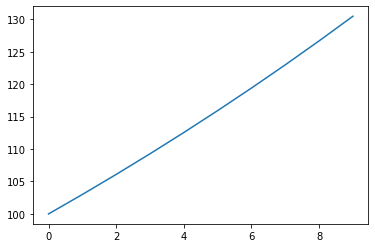

In [19]:
plt.plot(inputs,outputs)
plt.show()

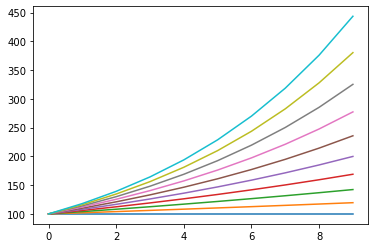

In [21]:
for i in range(10):
    inputs = [t for t in range(10)]
    outputs = PopulationModel(100,i*0.02,10)
    plt.plot(inputs,outputs)
plt.show()

### Bifurcation
Now graph the value of $ P(9) $ against the changing value of $ \alpha $.  So the inputs are the $ \alpha $ values and the outputs are the values of $ P(9) $.

In [25]:
alpha_inputs = [0.2*(t/100-0.5) for t in range(101)]
P9_outputs = [PopulationModel(100,alpha,10)[-1] for alpha in alpha_inputs]

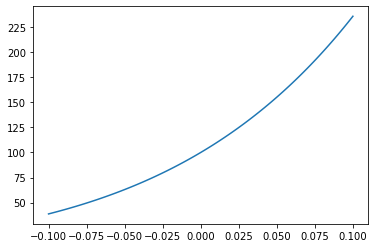

In [26]:
plt.plot(alpha_inputs,P9_outputs)
plt.show()